<a href="https://colab.research.google.com/github/Lunalykaya/cs_homework/blob/main/academicwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
pip install pmdarima

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

from statsmodels.tsa.seasonal import STL

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

#from pmdarima import auto_arima

In [78]:
df = pd.read_excel('vvp.xlsx')

In [79]:
df.head()

–ü–µ—Ä–∏–æ–¥ –í–∞–ª–æ–≤–æ–π –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–π –ø—Ä–æ–¥—É–∫—Ç (–í–í–ü) Unnamed: 2
0    1995/I –∫–≤–∞—Ä—Ç–∞–ª                                0        (–ª)
1   1995/II –∫–≤–∞—Ä—Ç–∞–ª                                0        (–ª)
2  1995/III –∫–≤–∞—Ä—Ç–∞–ª                                0        (–ª)
3   1995/IV –∫–≤–∞—Ä—Ç–∞–ª                                0        (–ª)
4    1996/I –∫–≤–∞—Ä—Ç–∞–ª                              3.3        (—Ä)

In [80]:
df.columns = ['time', 'GDP Growth (%)', 'tags']

–°–ø–∏—Å–æ–∫ —Ç–µ–≥–æ–≤:
–±	–†–∞–∑—Ä—ã–≤ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞	—Å	–ö–æ–Ω—Ñ–∏–¥–µ–Ω—Ü–∏–∞–ª—å–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è	–≥	–†–∞–∑–Ω–∏—Ü–∞ –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏
–¥–∞	–û—Ü–µ–Ω–æ—á–Ω–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å	—Ñ	–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ	–∏	–í–º–µ–Ω–µ–Ω–Ω–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å
–∏	–û—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ ‚Äî –¥–∞–Ω–Ω—ã–µ —Å—É—â–µ—Å—Ç–≤—É—é—Ç, –Ω–æ –Ω–µ –±—ã–ª–∏ —Å–æ–±—Ä–∞–Ω—ã.	-	–û—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ ‚Äî –¥–∞–Ω–Ω—ã–µ –Ω–µ –º–æ–≥—É—Ç —Å—É—â–µ—Å—Ç–≤–æ–≤–∞—Ç—å	–Ω	–ù–µ –∏–º–µ–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è
‚Ä¶	–î–∞–Ω–Ω—ã–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç.	–ø	–ü—Ä–µ–¥—ã–¥—É—â–∏–µ –¥–∞–Ω–Ω—ã–µ	–≤	–ù–∏–∑–∫–∞—è –Ω–∞–¥–µ–∂–Ω–æ—Å—Ç—å
–≥	–ü–µ—Ä–µ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ	*	–ò—Å–ø—Ä–∞–≤–ª–µ–Ω–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è

In [81]:
df["GDP Growth (%)"] = df["GDP Growth (%)"].astype(str).str.replace(r'[^0-9.-]', '', regex=True)
df["GDP Growth (%)"] = pd.to_numeric(df["GDP Growth (%)"], errors='coerce')

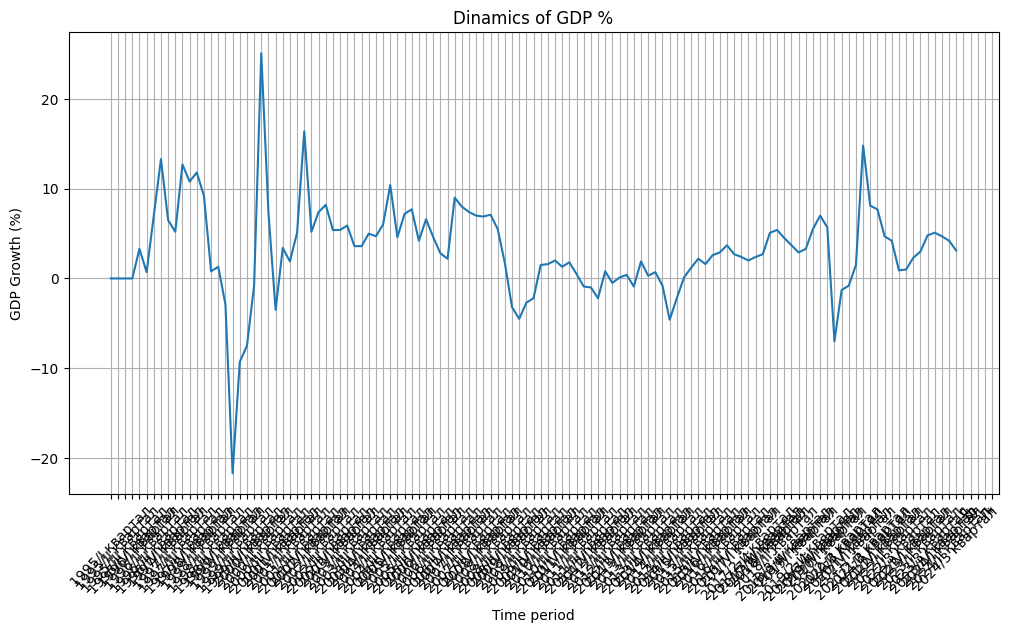

In [82]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['time'], y=df["GDP Growth (%)"])
plt.xlabel("Time period")
plt.ylabel("GDP Growth (%)")
plt.title("Dinamics of GDP %")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [83]:
fig = px.line(df, x='time', y='GDP Growth (%)', title="Dynamics of GDP %")
fig.update_layout(
    xaxis_title="Time period",
    yaxis_title="GDP Growth (%)",
    xaxis=dict(tickangle=45),
    template="plotly_white"
)

fig.show()

–ì—Ä–∞—Ñ–∏–∫ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥, –æ—Ç–æ–±—Ä–∞–∂–∞—é—â–∏–π –¥–∏–Ω–∞–º–∏–∫—É —Ä–æ—Å—Ç–∞ –í–í–ü (%) –ø–æ –∫–≤–∞—Ä—Ç–∞–ª–∞–º. –í–æ—Ç —á—Ç–æ –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å:  

1. **–û—Å—å X**:  
   - –ü–æ–¥–ø–∏—Å–∏ –Ω–∞ –æ—Å–∏ X –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç –∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã–µ –ø–µ—Ä–∏–æ–¥—ã, –Ω–∞–ø—Ä–∏–º–µ—Ä, "1995 1 –∫–≤–∞—Ä—Ç–∞–ª", "1996 2 –∫–≤–∞—Ä—Ç–∞–ª" –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ.  
   - –ü–æ–¥–ø–∏—Å–∏ –≤—ã–≥–ª—è–¥—è—Ç –ø–µ—Ä–µ–≥—Ä—É–∂–µ–Ω–Ω—ã–º–∏ –∏ –Ω–∞–∫–ª–æ–Ω–µ–Ω—ã –ø–æ–¥ —É–≥–ª–æ–º, —á—Ç–æ –∑–∞—Ç—Ä—É–¥–Ω—è–µ—Ç –∏—Ö —á—Ç–µ–Ω–∏–µ. –í–æ–∑–º–æ–∂–Ω–æ, —Å—Ç–æ–∏—Ç —É–∫–æ—Ä–æ—Ç–∏—Ç—å –ø–æ–¥–ø–∏—Å–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, "1995-Q1" –≤–º–µ—Å—Ç–æ "1995 1 –∫–≤–∞—Ä—Ç–∞–ª").  
   
2. **–û—Å—å Y**:  
   - –û—Ç–æ–±—Ä–∞–∂–∞–µ—Ç –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –í–í–ü, —Å –∑–∞–º–µ—Ç–Ω—ã–º–∏ —Å–∫–∞—á–∫–∞–º–∏ –≤–≤–µ—Ä—Ö –∏ –≤–Ω–∏–∑.  
   - –í–∏–¥–Ω–æ, —á—Ç–æ –≤ –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã —Ä–æ—Å—Ç –í–í–ü —Ä–µ–∑–∫–æ –ø–∞–¥–∞–ª (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ –∫–æ–Ω—Ü–µ 90-—Ö –≥–æ–¥–æ–≤) –∏ –∑–∞—Ç–µ–º –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–ª—Å—è.  

3. **–û–±—â–∏–π —Ç—Ä–µ–Ω–¥**:  
   - –í –∫–æ–Ω—Ü–µ 90-—Ö –±—ã–ª —Ä–µ–∑–∫–∏–π —Å–ø–∞–¥ –í–í–ü, –ø–æ—Å–ª–µ –∫–æ—Ç–æ—Ä–æ–≥–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞–ª –±—ã—Å—Ç—Ä—ã–π —Ä–æ—Å—Ç.  
   - –ü–æ—Å–ª–µ 2000-—Ö –∏–∑–º–µ–Ω–µ–Ω–∏—è —Å—Ç–∞–Ω–æ–≤—è—Ç—Å—è –±–æ–ª–µ–µ —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–º–∏, –Ω–æ –ø–µ—Ä–∏–æ–¥–∏—á–µ—Å–∫–∏ –ø–æ—è–≤–ª—è—é—Ç—Å—è –≤–æ–ª–∞—Ç–∏–ª—å–Ω—ã–µ —Å–∫–∞—á–∫–∏.  
   - –í–∏–¥–Ω—ã –∫—Ä–∏–∑–∏—Å–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, 2008-2009 –∏ 2020 –≥–æ–¥—ã), –∫–æ–≥–¥–∞ –í–í–ü —Ä–µ–∑–∫–æ –ø–∞–¥–∞–ª.  

4. **–ß—Ç–æ –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å**:  
   - –£–∫–æ—Ä–æ—Ç–∏—Ç—å –ø–æ–¥–ø–∏—Å–∏ –æ—Å–∏ X.  
   - –î–æ–±–∞–≤–∏—Ç—å –º–∞—Ä–∫–µ—Ä—ã –Ω–∞ –ª–∏–Ω–∏–∏ –¥–ª—è –ª—É—á—à–µ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ —Ç–æ—á–µ–∫.  
   - –î–æ–±–∞–≤–∏—Ç—å –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—ã–µ –ª–∏–Ω–∏–∏ –∏–ª–∏ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏ –¥–ª—è –æ–±–æ–∑–Ω–∞—á–µ–Ω–∏—è –∫—Ä–∏–∑–∏—Å–Ω—ã—Ö –ø–µ—Ä–∏–æ–¥–æ–≤.  

–ï—Å–ª–∏ –µ—Å—Ç—å –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–π –≤–æ–ø—Ä–æ—Å –∏–ª–∏ —Ö–æ—á–µ—à—å —á—Ç–æ-—Ç–æ –ø–æ–¥–ø—Ä–∞–≤–∏—Ç—å –≤ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ ‚Äî –¥–∞–≤–∞–π —Ä–∞–∑–±–µ—Ä—ë–º! üòä

### **–ê–Ω–∞–ª–∏–∑ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞: –î–∏–Ω–∞–º–∏–∫–∞ —Ä–æ—Å—Ç–∞ –í–í–ü (%)**  

#### **1. –û–±—â–∞—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –≥—Ä–∞—Ñ–∏–∫–∞**  
–ì—Ä–∞—Ñ–∏–∫ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥, –≥–¥–µ:  
- **–û—Å—å X** ‚Äì –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç –∫–≤–∞—Ä—Ç–∞–ª—ã —Å 1995 –≥–æ–¥–∞ –ø–æ –Ω–∞—Å—Ç–æ—è—â–µ–µ –≤—Ä–µ–º—è, –Ω–æ –Ω–∞–∑–≤–∞–Ω–∏—è –ø–æ–¥–ø–∏—Å–µ–π –¥–ª–∏–Ω–Ω—ã–µ –∏ –Ω–∞–∫–ª–æ–Ω–µ–Ω—ã, —á—Ç–æ –∑–∞—Ç—Ä—É–¥–Ω—è–µ—Ç —á—Ç–µ–Ω–∏–µ.  
- **–û—Å—å Y** ‚Äì –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –í–í–ü, —Å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏.  

–ì—Ä–∞—Ñ–∏–∫ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç —Ü–∏–∫–ª–∏—á–Ω–æ—Å—Ç—å –∏ –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å –í–í–ü, —Å —Ä–µ–∑–∫–∏–º–∏ –ø–∞–¥–µ–Ω–∏—è–º–∏ –∏ –ø–µ—Ä–∏–æ–¥–∞–º–∏ —É—Å—Ç–æ–π—á–∏–≤–æ–≥–æ —Ä–æ—Å—Ç–∞.  

---

#### **2. –û—Å–Ω–æ–≤–Ω—ã–µ —Ç—Ä–µ–Ω–¥—ã –∏ –∞–Ω–æ–º–∞–ª–∏–∏**  
**–†–∞–Ω–Ω–∏–π –ø–µ—Ä–∏–æ–¥ (1995-2000)**  
- –í–∏–¥–µ–Ω –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π —Ä–æ—Å—Ç –í–í–ü –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ 90-—Ö, –Ω–æ –∑–∞—Ç–µ–º –≤ –∫–æ–Ω—Ü–µ –¥–µ—Å—è—Ç–∏–ª–µ—Ç–∏—è –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç **—Ä–µ–∑–∫–∏–π –æ–±–≤–∞–ª**.  
- –°–∞–º—ã–π –≥–ª—É–±–æ–∫–∏–π —Å–ø–∞–¥ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –æ–∫–æ–ª–æ 1998-1999 –≥–æ–¥–æ–≤. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–º –∫—Ä–∏–∑–∏—Å–æ–º 1998 –≥–æ–¥–∞, –∫–æ–≥–¥–∞ —ç–∫–æ–Ω–æ–º–∏–∫–∞ –º–Ω–æ–≥–∏—Ö —Å—Ç—Ä–∞–Ω –ø–µ—Ä–µ–∂–∏–≤–∞–ª–∞ —Å–∏–ª—å–Ω—ã–µ –ø–æ—Ç—Ä—è—Å–µ–Ω–∏—è.  

**2000-2008 ‚Äì –†–æ—Å—Ç —Å –∫–æ–ª–µ–±–∞–Ω–∏—è–º–∏**  
- –í –Ω–∞—á–∞–ª–µ 2000-—Ö –≥–æ–¥–æ–≤ —ç–∫–æ–Ω–æ–º–∏–∫–∞ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –∏ —Ä–æ—Å—Ç, –Ω–æ —Å **–≤—ã—Å–æ–∫–æ–π –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å—é**.  
- –í –ø–µ—Ä–∏–æ–¥ 2005-2008 —Ä–æ—Å—Ç –í–í–ü –∫–∞–∂–µ—Ç—Å—è –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Å—Ç–∞–±–∏–ª—å–Ω—ã–º, –±–µ–∑ —Ä–µ–∑–∫–∏—Ö —Å–∫–∞—á–∫–æ–≤.  

**2008-2009 ‚Äì –ì–ª–æ–±–∞–ª—å–Ω—ã–π —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–π –∫—Ä–∏–∑–∏—Å**  
- –ù–∞–±–ª—é–¥–∞–µ—Ç—Å—è **—Ä–µ–∑–∫–æ–µ –ø–∞–¥–µ–Ω–∏–µ –í–í–ü** –≤ 2008-2009 –≥–æ–¥–∞—Ö, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–µ –º–∏—Ä–æ–≤–æ–º—É —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–º—É –∫—Ä–∏–∑–∏—Å—É.  
- –ü–æ—Å–ª–µ —ç—Ç–æ–≥–æ —Å–ª–µ–¥—É–µ—Ç **–±—ã—Å—Ç—Ä–æ–µ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ**, –Ω–æ –æ–Ω–æ –Ω–µ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç –ø—Ä–µ–¥–∫—Ä–∏–∑–∏—Å–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è.  

**2010-2019 ‚Äì –£–º–µ—Ä–µ–Ω–Ω–∞—è —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å —Å —Ñ–ª—É–∫—Ç—É–∞—Ü–∏—è–º–∏**  
- –í —ç—Ç–æ—Ç –ø–µ—Ä–∏–æ–¥ –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è **–æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Å—Ç–∞–±–∏–ª—å–Ω—ã–µ –∫–æ–ª–µ–±–∞–Ω–∏—è**, –Ω–æ —Å —ç–ø–∏–∑–æ–¥–∏—á–µ—Å–∫–∏–º–∏ –ø–∞–¥–µ–Ω–∏—è–º–∏.  
- –í —Ü–µ–ª–æ–º, —Ç—Ä–µ–Ω–¥ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —É–º–µ—Ä–µ–Ω–Ω—ã–π —Ä–æ—Å—Ç, –Ω–æ –Ω–µ —Ç–∞–∫–æ–π —Ä–µ–∑–∫–∏–π, –∫–∞–∫ –≤ 2000-—Ö.  

**2020 ‚Äì –ü–∞–Ω–¥–µ–º–∏—è COVID-19**  
- –í–∏–¥–µ–Ω **—Ä–µ–∑–∫–∏–π —Å–ø–∞–¥ –í–í–ü** –≤ 2020 –≥–æ–¥—É, —á—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å –≥–ª–æ–±–∞–ª—å–Ω–æ–π –ø–∞–Ω–¥–µ–º–∏–µ–π COVID-19.  
- –û–¥–Ω–∞–∫–æ –ø–æ—Å–ª–µ —ç—Ç–æ–≥–æ —Å–ª–µ–¥—É–µ—Ç **–±—ã—Å—Ç—Ä–æ–µ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ**.  

**2021-2024 ‚Äì –í–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å**  
- –í –ø–æ—Å–ª–µ–¥–Ω–∏–µ –≥–æ–¥—ã –∫–æ–ª–µ–±–∞–Ω–∏—è –æ—Å—Ç–∞—é—Ç—Å—è, –Ω–æ –Ω–µ —Ç–∞–∫–∏–µ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ, –∫–∞–∫ –≤ –∫—Ä–∏–∑–∏—Å–Ω—ã–µ –ø–µ—Ä–∏–æ–¥—ã.  
- –í–í–ü –ø–æ—Å–ª–µ 2022 –≥–æ–¥–∞ –∏–º–µ–µ—Ç —Ç–µ–Ω–¥–µ–Ω—Ü–∏—é –∫ —Ä–æ—Å—Ç—É, –Ω–æ —Å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∫–æ–ª–µ–±–∞–Ω–∏—è–º–∏.  

---

#### **3. –ù–µ–æ–±—ã—á–Ω—ã–µ –∏ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã**  
- **–ö—Ä–∞–π–Ω–µ —Ä–µ–∑–∫–∏–µ —Å–∫–∞—á–∫–∏**: –í –∫–æ–Ω—Ü–µ 90-—Ö –∏ 2008-2009 –≥–æ–¥–∞—Ö —Å–ø–∞–¥—ã –±—ã–ª–∏ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω–æ –≥–ª—É–±–æ–∫–∏–º–∏, –∞ –∑–∞—Ç–µ–º –±—ã—Å—Ç—Ä–æ–µ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ.  
- **–°–∏–ª—å–Ω—ã–π —Ä–æ—Å—Ç –ø–æ—Å–ª–µ –∫—Ä–∏–∑–∏—Å–æ–≤**: –í–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –ø–æ—Å–ª–µ –∫—Ä–∏–∑–∏—Å–æ–≤ –ø—Ä–æ–∏—Å—Ö–æ–¥—è—Ç –¥–æ–≤–æ–ª—å–Ω–æ —Ä–µ–∑–∫–æ, –æ—Å–æ–±–µ–Ω–Ω–æ –ø–æ—Å–ª–µ 2009 –∏ 2020 –≥–æ–¥–æ–≤.  
- **–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –Ω–µ–æ–∂–∏–¥–∞–Ω–Ω—ã–µ –≤—Å–ø–ª–µ—Å–∫–∏**: –í –æ—Ç–¥–µ–ª—å–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, –æ–∫–æ–ª–æ 1999-2000 –∏ 2010-2011) –≤–∏–¥–Ω—ã **–∞–Ω–æ–º–∞–ª—å–Ω–æ –≤—ã—Å–æ–∫–∏–µ –≤—Å–ø–ª–µ—Å–∫–∏ –í–í–ü**. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å –≤—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –º–µ—Ä–∞–º–∏ —Å—Ç–∏–º—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —ç–∫–æ–Ω–æ–º–∏–∫–∏.  

---

#### **4. –ß—Ç–æ –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å –∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å**  
- **–î–æ–±–∞–≤–∏—Ç—å –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫** (–Ω–∞–ø—Ä–∏–º–µ—Ä, —É–∫–∞–∑–∞—Ç—å –∫—Ä–∏–∑–∏—Å—ã, –ø–∞–Ω–¥–µ–º–∏—é COVID-19 –∏ –ø–µ—Ä–∏–æ–¥—ã –∞–∫—Ç–∏–≤–Ω–æ–≥–æ —Ä–æ—Å—Ç–∞).  
- **–ü–æ—Å—Ç—Ä–æ–∏—Ç—å —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ** –¥–ª—è –±–æ–ª–µ–µ —á–µ—Ç–∫–æ–≥–æ –ø–æ–Ω–∏–º–∞–Ω–∏—è —Ç—Ä–µ–Ω–¥–æ–≤.  
- **–†–∞–∑–¥–µ–ª–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫ –Ω–∞ –ø–µ—Ä–∏–æ–¥—ã (–¥–æ –∫—Ä–∏–∑–∏—Å–æ–≤, –ø–æ—Å–ª–µ –∫—Ä–∏–∑–∏—Å–æ–≤) –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å –∏—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏**.  
- **–ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ –º–µ—Ç—Ä–∏–∫–∏**: –Ω–∞–ø—Ä–∏–º–µ—Ä, —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–µ —Ç–æ–ª—å–∫–æ –í–í–ü –≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö, –Ω–æ –∏ –∞–±—Å–æ–ª—é—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.  
- **–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å –¥—Ä—É–≥–∏–º–∏ —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∏–º–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏**, —Ç–∞–∫–∏–º–∏ –∫–∞–∫ –∏–Ω—Ñ–ª—è—Ü–∏—è, —É—Ä–æ–≤–µ–Ω—å –±–µ–∑—Ä–∞–±–æ—Ç–∏—Ü—ã –∏ –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–∏.  

---

### **–í—ã–≤–æ–¥—ã**  
- –ì—Ä–∞—Ñ–∏–∫ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç **—Ü–∏–∫–ª–∏—á–Ω–æ—Å—Ç—å** —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞–∑–≤–∏—Ç–∏—è, –ø–µ—Ä–∏–æ–¥—ã —Ä–æ—Å—Ç–∞ –∏ –∫—Ä–∏–∑–∏—Å—ã.  
- –ù–∞–∏–±–æ–ª–µ–µ —Å–∏–ª—å–Ω—ã–µ –ø–∞–¥–µ–Ω–∏—è –í–í–ü —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –∏–∑–≤–µ—Å—Ç–Ω—ã–º –º–∏—Ä–æ–≤—ã–º –∏ —Ä–µ–≥–∏–æ–Ω–∞–ª—å–Ω—ã–º –∫—Ä–∏–∑–∏—Å–∞–º (1998, 2008, 2020).  
- –í–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –ø–æ—Å–ª–µ –∫—Ä–∏–∑–∏—Å–æ–≤ –ø—Ä–æ–∏—Å—Ö–æ–¥—è—Ç **–±—ã—Å—Ç—Ä–æ**, –Ω–æ —Ç—Ä–µ–Ω–¥ –ø–æ—Å–ª–µ 2010 –≥–æ–¥–∞ –º–µ–Ω–µ–µ –≤–æ–ª–∞—Ç–∏–ª—å–Ω—ã–π, —á–µ–º –≤ 90-—Ö –∏ 2000-—Ö.  
- –î–∞–ª—å–Ω–µ–π—à–∏–π –∞–Ω–∞–ª–∏–∑ –º–æ–∂–µ—Ç –≤–∫–ª—é—á–∞—Ç—å –¥–µ—Ç–∞–ª–∏–∑–∞—Ü–∏—é —Ñ–∞–∫—Ç–æ—Ä–æ–≤, –≤–ª–∏—è—é—â–∏—Ö –Ω–∞ –∏–∑–º–µ–Ω–µ–Ω–∏—è –í–í–ü, –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ø—Ä–æ–≥–Ω–æ—Å—Ç–∏—á–µ—Å–∫–∏—Ö –º–æ–¥–µ–ª–µ–π.  

–ï—Å–ª–∏ —Ö–æ—á–µ—à—å —á—Ç–æ-—Ç–æ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∏–ª–∏ –¥–æ–ø–æ–ª–Ω–∏—Ç—å ‚Äî –¥–∞–≤–∞–π —Ä–∞–∑–±–µ—Ä—ë–º! üòä

In [84]:
df.describe()

GDP Growth (%)
count      119.000000
mean         3.170588
std          5.245278
min        -21.700000
25%          0.600000
50%          2.900000
75%          5.500000
max         25.100000

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            124 non-null    object 
 1   GDP Growth (%)  119 non-null    float64
 2   tags            123 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.2+ KB


In [86]:
df['year'] = df['time'].str.extract(r'(\d{4})')
df_yearly = df.groupby('year')['GDP Growth (%)'].mean().reset_index()


In [87]:
df_yearly

year  GDP Growth (%)
0   1995           0.000
1   1996           6.075
2   1997           8.800
3   1998           5.775
4   1999         -10.350
5   2000           7.050
6   2001           6.700
7   2002           6.550
8   2003           4.625
9   2004           6.525
10  2005           5.925
11  2006           4.050
12  2007           7.850
13  2008           5.300
14  2009          -3.150
15  2010           1.600
16  2011           0.100
17  2012          -0.450
18  2013           0.425
19  2014          -1.725
20  2015           1.275
21  2016           2.975
22  2017           2.375
23  2018           4.675
24  2019           4.675
25  2020          -0.850
26  2021           8.025
27  2022           2.700
28  2023           3.800
29  2024           4.000

In [88]:
fig = px.line(df_yearly, x='year', y='GDP Growth (%)', title='–°—Ä–µ–¥–Ω–∏–π —Ä–æ—Å—Ç –í–í–ü –ø–æ –≥–æ–¥–∞–º')
fig.show()

In [89]:
df.head()

time  GDP Growth (%) tags  year
0    1995/I –∫–≤–∞—Ä—Ç–∞–ª             0.0  (–ª)  1995
1   1995/II –∫–≤–∞—Ä—Ç–∞–ª             0.0  (–ª)  1995
2  1995/III –∫–≤–∞—Ä—Ç–∞–ª             0.0  (–ª)  1995
3   1995/IV –∫–≤–∞—Ä—Ç–∞–ª             0.0  (–ª)  1995
4    1996/I –∫–≤–∞—Ä—Ç–∞–ª             3.3  (—Ä)  1996

In [90]:
df_yearly.head()

year  GDP Growth (%)
0  1995           0.000
1  1996           6.075
2  1997           8.800
3  1998           5.775
4  1999         -10.350

In [91]:
df_merged = pd.merge(df, df_yearly, on='year', how='left')

In [92]:
df_merged.head(10)

time  GDP Growth (%)_x tags  year  GDP Growth (%)_y
0    1995/I –∫–≤–∞—Ä—Ç–∞–ª               0.0  (–ª)  1995             0.000
1   1995/II –∫–≤–∞—Ä—Ç–∞–ª               0.0  (–ª)  1995             0.000
2  1995/III –∫–≤–∞—Ä—Ç–∞–ª               0.0  (–ª)  1995             0.000
3   1995/IV –∫–≤–∞—Ä—Ç–∞–ª               0.0  (–ª)  1995             0.000
4    1996/I –∫–≤–∞—Ä—Ç–∞–ª               3.3  (—Ä)  1996             6.075
5   1996/II –∫–≤–∞—Ä—Ç–∞–ª               0.7  (—Ä)  1996             6.075
6  1996/III –∫–≤–∞—Ä—Ç–∞–ª               7.0  (—Ä)  1996             6.075
7   1996/IV –∫–≤–∞—Ä—Ç–∞–ª              13.3  (—Ä)  1996             6.075
8    1997/I –∫–≤–∞—Ä—Ç–∞–ª               6.5  (—Ä)  1997             8.800
9   1997/II –∫–≤–∞—Ä—Ç–∞–ª               5.2  (—Ä)  1997             8.800

In [93]:


fig = go.Figure()

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –∫–≤–∞—Ä—Ç–∞–ª—å–Ω–æ–≥–æ —Ä–æ—Å—Ç–∞
fig.add_trace(go.Scatter(
    x=df_merged['time'],
    y=df_merged['GDP Growth (%)_x'],
    name='–ö–≤–∞—Ä—Ç–∞–ª—å–Ω—ã–π —Ä–æ—Å—Ç',
    line=dict(color='#1f77b4', width=1),
    mode='lines+markers',
    marker=dict(size=5, symbol='circle-open')))

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –≥–æ–¥–æ–≤–æ–≥–æ —Ç—Ä–µ–Ω–¥–∞
fig.add_trace(go.Scatter(
    x=df_merged['time'],
    y=df_merged['GDP Growth (%)_y'],
    name='–ì–æ–¥–æ–≤–æ–π —Ç—Ä–µ–Ω–¥',
    line=dict(color='#ff7f0e', width=3, dash='dot'),
    mode='lines+markers',
    marker=dict(size=10, symbol='diamond'),
    yaxis='y2',  # –í–∞–∂–Ω—ã–π –º–æ–º–µ–Ω—Ç, —á—Ç–æ–±—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤—Ç–æ—Ä—É—é –æ—Å—å Y
))

# –û–±–Ω–æ–≤–ª–µ–Ω–∏–µ –º–∞–∫–µ—Ç–∞ —Å –≤—Ç–æ—Ä–æ–π –æ—Å—å—é Y
fig.update_layout(
    title='–î–∏–Ω–∞–º–∏–∫–∞ –í–í–ü: –∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ –≥–æ–¥–æ–≤–æ–π —Ç—Ä–µ–Ω–¥',
    xaxis_title="–ü–µ—Ä–∏–æ–¥",
    yaxis_title="–†–æ—Å—Ç –í–í–ü (%)",
    yaxis2=dict(
        title="–ì–æ–¥–æ–≤–æ–π —Ç—Ä–µ–Ω–¥ –í–í–ü (%)",
        overlaying='y',  # –ù–∞–ª–æ–∂–µ–Ω–∏–µ –æ—Å–µ–π
        side='right',  # –í—Ç–æ—Ä–∞—è –æ—Å—å —Å–ø—Ä–∞–≤–∞
        range=[df_merged[['GDP Growth (%)_x', 'GDP Growth (%)_y']].min().min(),
               df_merged[['GDP Growth (%)_x', 'GDP Growth (%)_y']].max().max()]
    ),
    template="plotly_white",
    hovermode="x unified",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig.show()


In [94]:
df['z_score'] = zscore(df['GDP Growth (%)'])

In [95]:
df_anomalies = df[abs(df['z_score']) > 3]

In [96]:
df_anomalies[['time', 'GDP Growth (%)']]

Empty DataFrame
Columns: [time, GDP Growth (%)]
Index: []

–≤—Å–µ —Ç–æ—á–∫–∏ –æ–∫–∞–∑–∞–ª–∏—Å—å –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö 3 —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π

In [97]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% —Ç–æ—á–µ–∫ —Å—á–∏—Ç–∞–µ–º –∞–Ω–æ–º–∞–ª–∏—è–º–∏
df['anomaly'] = iso_forest.fit_predict(df[['GDP Growth (%)']])

df_anomalies_ml = df[df['anomaly'] == -1]
print(df_anomalies_ml[['time', 'GDP Growth (%)']])

                 time  GDP Growth (%)
17    1999/II –∫–≤–∞—Ä—Ç–∞–ª           -21.7
18   1999/III –∫–≤–∞—Ä—Ç–∞–ª            -9.3
19    1999/IV –∫–≤–∞—Ä—Ç–∞–ª            -7.5
21    2000/II –∫–≤–∞—Ä—Ç–∞–ª            25.1
27    2001/IV –∫–≤–∞—Ä—Ç–∞–ª            16.4
101  2020/2-–π –∫–≤–∞—Ä—Ç–∞–ª            -7.0
105  2021/2-–π –∫–≤–∞—Ä—Ç–∞–ª            14.8


In [98]:
fig = px.line(df, x='time', y='GDP Growth (%)', title='GDP Growth Dynamics')
fig.add_scatter(x=df_anomalies_ml['time'], y=df_anomalies_ml['GDP Growth (%)'],
                mode='markers', marker=dict(color='red', size=8), name='Anomalies')

fig.update_xaxes(title='Time period', tickangle=45)
fig.update_yaxes(title='GDP Growth (%)')
fig.show()

–í–æ—Ç –∫–∞–∫ –º–æ–∂–Ω–æ –æ–±—ä—è—Å–Ω–∏—Ç—å —ç—Ç–∏ –∞–Ω–æ–º–∞–ª–∏–∏ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –∏—Å—Ç–æ—Ä–∏–∏, —ç–∫–æ–Ω–æ–º–∏–∫–∏ –∏ —Ä–µ–≥–∏–æ–Ω–∞–ª—å–Ω–æ–≥–æ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞.  

---

## **–ê–Ω–∞–ª–∏–∑ –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö —Å–∫–∞—á–∫–æ–≤ –í–í–ü –°–µ—Ä–±–∏–∏: –∏—Å—Ç–æ—Ä–∏–∫–æ-—ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∏–π –∫–æ–Ω—Ç–µ–∫—Å—Ç**  

### **–í–≤–µ–¥–µ–Ω–∏–µ**  
–ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –æ —Ä–æ—Å—Ç–µ –í–í–ü —á–∞—Å—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –≤—ã—è–≤–∏—Ç—å –ø–µ—Ä–∏–æ–¥—ã –∫—Ä–∏–∑–∏—Å–æ–≤, —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∏—Ö —à–æ–∫–æ–≤ –∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è. –í –¥–∞–Ω–Ω–æ–º –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–∏ –≤—ã–¥–µ–ª–µ–Ω—ã –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è –í–í–ü –°–µ—Ä–±–∏–∏ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ –¥–µ—Å—è—Ç–∏–ª–µ—Ç–∏—è, –∫–æ—Ç–æ—Ä—ã–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç —Å –∫–ª—é—á–µ–≤—ã–º–∏ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–º–∏ —Å–æ–±—ã—Ç–∏—è–º–∏: –≤–æ–µ–Ω–Ω—ã–µ –∫–æ–Ω—Ñ–ª–∏–∫—Ç—ã, –ø–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—è –∏ –≥–ª–æ–±–∞–ª—å–Ω—ã–µ –∫—Ä–∏–∑–∏—Å—ã.  

---

### **1999 –≥–æ–¥: —Ä–µ–∑–∫–∏–π —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∏–π —Å–ø–∞–¥ (-21.7%, -9.3%, -7.5%)**  
**–ò—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–π –∫–æ–Ω—Ç–µ–∫—Å—Ç:**  
–í–µ—Å–Ω–æ–π 1999 –≥–æ–¥–∞ –Ω–∞—á–∞–ª–∞—Å—å **–æ–ø–µ—Ä–∞—Ü–∏—è –ù–ê–¢–û –ø—Ä–æ—Ç–∏–≤ –Æ–≥–æ—Å–ª–∞–≤–∏–∏**, —Å–≤—è–∑–∞–Ω–Ω–∞—è —Å –∫–æ—Å–æ–≤—Å–∫–∏–º –∫–æ–Ω—Ñ–ª–∏–∫—Ç–æ–º. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ:  
- –†–∞–∑—Ä—É—à–µ–Ω–∞ –∫–ª—é—á–µ–≤–∞—è –∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä–∞ (–º–æ—Å—Ç—ã, –∑–∞–≤–æ–¥—ã, —ç–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–Ω—Ü–∏–∏).  
- –ú–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã–µ —Å–∞–Ω–∫—Ü–∏–∏ –∏ –∏–∑–æ–ª—è—Ü–∏—è —ç–∫–æ–Ω–æ–º–∏–∫–∏.  
- –ö–æ–ª–ª–∞–ø—Å –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞ –∏ —Å–Ω–∏–∂–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è.  

–ü–æ—ç—Ç–æ–º—É –ø–∞–¥–µ–Ω–∏–µ –í–í–ü –Ω–∞ **21.7% –≤–æ –≤—Ç–æ—Ä–æ–º –∫–≤–∞—Ä—Ç–∞–ª–µ 1999 –≥–æ–¥–∞** –±—ã–ª–æ –æ–∂–∏–¥–∞–µ–º—ã–º. –ó–∞–º–µ–¥–ª–µ–Ω–∏–µ —Å–ø–∞–¥–∞ –≤ —Å–ª–µ–¥—É—é—â–∏—Ö –∫–≤–∞—Ä—Ç–∞–ª–∞—Ö (-9.3%, -7.5%) –º–æ–≥–ª–æ –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å –∞–¥–∞–ø—Ç–∞—Ü–∏–µ–π —ç–∫–æ–Ω–æ–º–∏–∫–∏ –∏ —Ç–µ–Ω–µ–≤—ã–º —Ä—ã–Ω–∫–æ–º, –Ω–æ –≤ —Ü–µ–ª–æ–º 1999 –≥–æ–¥ –±—ã–ª –æ–¥–Ω–æ–π –∏–∑ —Å–∞–º—ã—Ö —Ç—è–∂—ë–ª—ã—Ö —Ä–µ—Ü–µ—Å—Å–∏–π –≤ –∏—Å—Ç–æ—Ä–∏–∏ —Å—Ç—Ä–∞–Ω—ã.  

---

### **2000/II –∫–≤–∞—Ä—Ç–∞–ª: —Ä–µ–∑–∫–∏–π —Ä–æ—Å—Ç –í–í–ü (25.1%)**  
**–ò—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–π –∫–æ–Ω—Ç–µ–∫—Å—Ç:**  
- **5 –æ–∫—Ç—è–±—Ä—è 2000 –≥–æ–¥–∞** ‚Äî —Ä–µ–≤–æ–ª—é—Ü–∏—è, —Å–≤–µ—Ä–∂–µ–Ω–∏–µ —Ä–µ–∂–∏–º–∞ –°–ª–æ–±–æ–¥–∞–Ω–∞ –ú–∏–ª–æ—à–µ–≤–∏—á–∞.  
- **–°–Ω—è—Ç–∏–µ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã—Ö —Å–∞–Ω–∫—Ü–∏–π** –∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–π —Å –ó–∞–ø–∞–¥–æ–º.  
- –ü–µ—Ä–≤–∞—è –≤–æ–ª–Ω–∞ —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∏—Ö —Ä–µ—Ñ–æ—Ä–º, –Ω–∞—á–∞–ª–æ –ø—Ä–∏–≤–∞—Ç–∏–∑–∞—Ü–∏–∏.  

–≠–∫–æ–Ω–æ–º–∏–∫–∞, –Ω–∞—Ö–æ–¥–∏–≤—à–∞—è—Å—è –≤ –≥–ª—É–±–æ–∫–æ–º –∫—Ä–∏–∑–∏—Å–µ, –Ω–∞—á–∞–ª–∞ –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—Ç—å—Å—è –ø–æ—Å–ª–µ –ø–æ–ª–∏—Ç–∏—á–µ—Å–∫–∏—Ö –ø–µ—Ä–µ–º–µ–Ω. –†–µ–∑–∫–∏–π —Ä–æ—Å—Ç –Ω–∞ **25.1% –≤–æ –≤—Ç–æ—Ä–æ–º –∫–≤–∞—Ä—Ç–∞–ª–µ 2000 –≥–æ–¥–∞** –º–æ–∂–Ω–æ –æ–±—ä—è—Å–Ω–∏—Ç—å —ç—Ñ—Ñ–µ–∫—Ç–æ–º –Ω–∏–∑–∫–æ–π –±–∞–∑—ã: –ø–æ—Å–ª–µ –∫–æ–ª–ª–∞–ø—Å–∞ 1999 –≥–æ–¥–∞ –ª—é–±–æ–µ —É–ª—É—á—à–µ–Ω–∏–µ –¥–∞–≤–∞–ª–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ.  

---

### **2001/IV –∫–≤–∞—Ä—Ç–∞–ª: –ø—Ä–æ–¥–æ–ª–∂–∞—é—â–µ–µ—Å—è –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ (16.4%)**  
–í 2001 –≥–æ–¥—É –°–µ—Ä–±–∏—è –Ω–∞—á–∞–ª–∞ **–ø–æ–ª–Ω–æ–º–∞—Å—à—Ç–∞–±–Ω—ã–µ —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∏–µ —Ä–µ—Ñ–æ—Ä–º—ã**:  
- **–ú–∞—Å—Å–æ–≤–∞—è –ø—Ä–∏–≤–∞—Ç–∏–∑–∞—Ü–∏—è** –ø—Ä–µ–¥–ø—Ä–∏—è—Ç–∏–π, –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏–µ –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–π.  
- **–û—Ç–∫—Ä—ã—Ç–∏–µ —Ä—ã–Ω–∫–æ–≤** –∏ –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ –≤ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—É—é —Ñ–∏–Ω–∞–Ω—Å–æ–≤—É—é —Å–∏—Å—Ç–µ–º—É.  
- **–°—Ç–∞–±–∏–ª–∏–∑–∞—Ü–∏—è –¥–∏–Ω–∞—Ä–∞** –∏ –∫–æ–Ω—Ç—Ä–æ–ª—å –∑–∞ –∏–Ω—Ñ–ª—è—Ü–∏–µ–π.  

–†–æ—Å—Ç **16.4% –≤ –∫–æ–Ω—Ü–µ 2001 –≥–æ–¥–∞** ‚Äî –ª–æ–≥–∏—á–Ω–æ–µ –ø—Ä–æ–¥–æ–ª–∂–µ–Ω–∏–µ –ø–æ–¥—ä—ë–º–∞ –ø–æ—Å–ª–µ –ø–∞–¥–µ–Ω–∏—è 1999 –≥–æ–¥–∞. –û–¥–Ω–∞–∫–æ —ç—Ç–æ—Ç —ç—Ñ—Ñ–µ–∫—Ç –±—ã–ª –≤—Ä–µ–º–µ–Ω–Ω—ã–º, –ø–æ—Å–∫–æ–ª—å–∫—É —Å—Ç—Ä—É–∫—Ç—É—Ä–Ω—ã–µ –ø—Ä–æ–±–ª–µ–º—ã —ç–∫–æ–Ω–æ–º–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω—è–ª–∏—Å—å.  

---

### **2020 –≥–æ–¥: –ø–∞–Ω–¥–µ–º–∏—á–µ—Å–∫–∏–π –∫—Ä–∏–∑–∏—Å (-7.0%)**  
**–ö–æ–Ω—Ç–µ–∫—Å—Ç:**  
–í—Ç–æ—Ä–æ–π –∫–≤–∞—Ä—Ç–∞–ª 2020 –≥–æ–¥–∞ –æ—Ç–º–µ—á–µ–Ω –≥–ª–æ–±–∞–ª—å–Ω—ã–º —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∏–º —Å–ø–∞–¥–æ–º –∏–∑-–∑–∞ –ø–∞–Ω–¥–µ–º–∏–∏ COVID-19. –í –°–µ—Ä–±–∏–∏:  
- **–õ–æ–∫–¥–∞—É–Ω—ã –∏ –∑–∞–∫—Ä—ã—Ç–∏–µ –≥—Ä–∞–Ω–∏—Ü** —Å–Ω–∏–∑–∏–ª–∏ —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫—É—é –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å.  
- **–°–Ω–∏–∂–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è** –∏ –∫–æ–ª–ª–∞–ø—Å —Ç—É—Ä–∏—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ —Å–µ–∫—Ç–æ—Ä–∞.  
- **–ü–µ—Ä–µ–±–æ–∏ –≤ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω–æ–π —Ç–æ—Ä–≥–æ–≤–ª–µ** –ø—Ä–∏–≤–µ–ª–∏ –∫ –ø–∞–¥–µ–Ω–∏—é —ç–∫—Å–ø–æ—Ä—Ç–∞.  

–í–í–ü —Å–Ω–∏–∑–∏–ª—Å—è –Ω–∞ **7.0%**, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –æ–±—â–µ–º–∏—Ä–æ–≤—ã–º —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è–º, —Ö–æ—Ç—è –°–µ—Ä–±–∏—è –ø–æ—Å—Ç—Ä–∞–¥–∞–ª–∞ –º–µ–Ω—å—à–µ, —á–µ–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –¥—Ä—É–≥–∏–µ –µ–≤—Ä–æ–ø–µ–π—Å–∫–∏–µ —Å—Ç—Ä–∞–Ω—ã.  

---

### **2021 –≥–æ–¥: –ø–æ—Å—Ç–∫—Ä–∏–∑–∏—Å–Ω–æ–µ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ (14.8%)**  
–ü–æ—Å–ª–µ —Å–Ω—è—Ç–∏—è –ª–æ–∫–¥–∞—É–Ω–æ–≤ —ç–∫–æ–Ω–æ–º–∏–∫–∞ –Ω–∞—á–∞–ª–∞ –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—Ç—å—Å—è:  
- **–ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã–µ –º–µ—Ä—ã –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –±–∏–∑–Ω–µ—Å–∞** –∏ –∫—Ä—É–ø–Ω—ã—Ö —Å–µ–∫—Ç–æ—Ä–æ–≤.  
- **–û–∂–∏–≤–ª–µ–Ω–∏–µ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω–æ–π —Ç–æ—Ä–≥–æ–≤–ª–∏ –∏ –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–π**.  
- **–†–æ—Å—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –ø–æ—Å–ª–µ –ø–∞–Ω–¥–µ–º–∏–∏**.  

–†–æ—Å—Ç **14.8% –≤–æ –≤—Ç–æ—Ä–æ–º –∫–≤–∞—Ä—Ç–∞–ª–µ 2021 –≥–æ–¥–∞** —Ç–∏–ø–∏—á–µ–Ω –¥–ª—è V-–æ–±—Ä–∞–∑–Ω–æ–≥–æ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –ø–æ—Å–ª–µ –∫—Ä–∏–∑–∏—Å–∞.  

---

## **–í—ã–≤–æ–¥—ã**  
–ê–Ω–∞–ª–∏–∑ –∞–Ω–æ–º–∞–ª–∏–π –≤ –í–í–ü –°–µ—Ä–±–∏–∏ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –∫–ª—é—á–µ–≤—ã–µ —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∏–µ —Å–∫–∞—á–∫–∏ —Å–≤—è–∑–∞–Ω—ã —Å –ø–æ–ª–∏—Ç–∏—á–µ—Å–∫–∏–º–∏ –∏ –≥–ª–æ–±–∞–ª—å–Ω—ã–º–∏ —Å–æ–±—ã—Ç–∏—è–º–∏.  
1. **1999: –≤–æ–µ–Ω–Ω—ã–π –∫–æ–Ω—Ñ–ª–∏–∫—Ç ‚Üí –≥–ª—É–±–æ–∫–∞—è —Ä–µ—Ü–µ—Å—Å–∏—è**.  
2. **2000-2001: –ø–æ–ª–∏—Ç–∏—á–µ—Å–∫–∏–µ –ø–µ—Ä–µ–º–µ–Ω—ã ‚Üí —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∏–π –ø–æ–¥—ä—ë–º**.  
3. **2020: –ø–∞–Ω–¥–µ–º–∏—è ‚Üí —Å–ø–∞–¥**.  
4. **2021: –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –ø–æ—Å–ª–µ –∫—Ä–∏–∑–∏—Å–∞**.  

–≠—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–¥—á–µ—Ä–∫–∏–≤–∞—é—Ç –≤–∞–∂–Ω–æ—Å—Ç—å –º–∞–∫—Ä–æ—ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–π —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏ –∏ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω–æ–π –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏–∏ –¥–ª—è –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω–æ–≥–æ —Ä–æ—Å—Ç–∞ –°–µ—Ä–±–∏–∏.  

---

–ö–∞–∫ —Ç–µ–±–µ —Ç–∞–∫–æ–π –∞–Ω–∞–ª–∏–∑? üòä

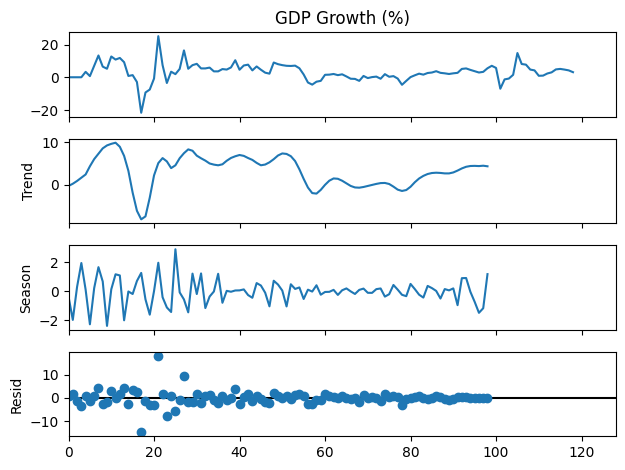

In [99]:
stl = STL(df['GDP Growth (%)'], period=4)
res = stl.fit()
fig = res.plot()

**–ê–Ω–∞–ª–∏–∑ –∫–≤–∞—Ä—Ç–∞–ª—å–Ω–æ–≥–æ —Ä–æ—Å—Ç–∞ –í–í–ü –°–µ—Ä–±–∏–∏ (1999‚Äì2022) —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º STL-–¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏**  

### 1. **–ò—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–π –∫–æ–Ω—Ç–µ–∫—Å—Ç –∏ –∫–ª—é—á–µ–≤—ã–µ —Å–æ–±—ã—Ç–∏—è**  
   - **1999‚Äì2000**: –ü–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –±–æ–º–±–∞—Ä–¥–∏—Ä–æ–≤–æ–∫ –ù–ê–¢–û, —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∞—è –∏–∑–æ–ª—è—Ü–∏—è, –≥–∏–ø–µ—Ä–∏–Ω—Ñ–ª—è—Ü–∏—è.  
   - **2000-–µ**: –ü–µ—Ä–µ—Ö–æ–¥ –∫ —Ä—ã–Ω–æ—á–Ω–æ–π —ç–∫–æ–Ω–æ–º–∏–∫–µ, –ø—Ä–∏–≤–∞—Ç–∏–∑–∞—Ü–∏—è, —Å—Ç–∞–±–∏–ª–∏–∑–∞—Ü–∏—è –ø–æ—Å–ª–µ –∫—Ä–∏–∑–∏—Å–∞.  
   - **2008‚Äì2009**: –ì–ª–æ–±–∞–ª—å–Ω—ã–π —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–π –∫—Ä–∏–∑–∏—Å ‚Äî –∑–∞–º–µ–¥–ª–µ–Ω–∏–µ —Ä–æ—Å—Ç–∞.  
   - **2010-–µ**: –ü–µ—Ä–µ–≥–æ–≤–æ—Ä—ã –æ –≤—Å—Ç—É–ø–ª–µ–Ω–∏–∏ –≤ –ï–°, –ø—Ä–∏—Ç–æ–∫ –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–π.  
   - **2020‚Äì2022**: –ü–∞–Ω–¥–µ–º–∏—è COVID-19, —Å–æ–∫—Ä–∞—â–µ–Ω–∏–µ –í–í–ü –≤ 2020 –≥., –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –≤ 2021‚Äì2022 –≥–≥.  

---

### 2. **–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç STL**  
   - **–¢—Ä–µ–Ω–¥ (Trend)**:  
     - –ù—É–ª–µ–≤–æ–π —Ç—Ä–µ–Ω–¥ –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–µ –ø–µ—Ä–∏–æ–¥—ã –º–æ–∂–µ—Ç –æ—Ç—Ä–∞–∂–∞—Ç—å **–¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—É—é —Å—Ç–∞–≥–Ω–∞—Ü–∏—é** (–Ω–∞–ø—Ä–∏–º–µ—Ä, 2000-–µ –≥–æ–¥—ã –∏–∑-–∑–∞ —Å—Ç—Ä—É–∫—Ç—É—Ä–Ω—ã—Ö —Ä–µ—Ñ–æ—Ä–º).  
     - –ú–∏–∫—Ä–æ–ø–æ–¥—ä–µ–º—ã –ø–æ—Å–ª–µ 2010 –≥. ‚Äî —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ª–∏–±–µ—Ä–∞–ª–∏–∑–∞—Ü–∏–∏ —ç–∫–æ–Ω–æ–º–∏–∫–∏ –∏ –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏–∏ —Å –ï–°.  
   - **–°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å (Season)**:  
     - –°–ª–∞–±–∞—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å (–±–ª–∏–∑–∫–∞—è –∫ –Ω—É–ª—é) –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è —Ç–µ–º, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ **—É–∂–µ —Å–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω—ã –Ω–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å** (—Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –ø—Ä–∞–∫—Ç–∏–∫–∞ –¥–ª—è –∫–≤–∞—Ä—Ç–∞–ª—å–Ω–æ–≥–æ –í–í–ü).  
     - –í —Å—ã—Ä—å–µ–≤—ã—Ö —Å–µ–∫—Ç–æ—Ä–∞—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Å–µ–ª—å—Å–∫–æ–µ —Ö–æ–∑—è–π—Å—Ç–≤–æ) —Å–µ–∑–æ–Ω–Ω—ã–µ –∫–æ–ª–µ–±–∞–Ω–∏—è –º–æ–≥–ª–∏ –Ω–∏–≤–µ–ª–∏—Ä–æ–≤–∞—Ç—å—Å—è –¥—Ä—É–≥–∏–º–∏ –æ—Ç—Ä–∞—Å–ª—è–º–∏.  
   - **–û—Å—Ç–∞—Ç–∫–∏ (Resid)**:  
     - –ü–∏–∫–∏ –¥–æ **-10%** —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –∫—Ä–∏–∑–∏—Å–∞–º:  
       - 1999 –≥. ‚Äî –≤–æ–µ–Ω–Ω—ã–µ —Ä–∞–∑—Ä—É—à–µ–Ω–∏—è,  
       - 2008‚Äì2009 –≥–≥. ‚Äî –≥–ª–æ–±–∞–ª—å–Ω—ã–π –∫—Ä–∏–∑–∏—Å,  
       - 2020 –≥. ‚Äî –ø–∞–Ω–¥–µ–º–∏—è.  

---

### 3. **–í–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å —Ä–æ—Å—Ç–∞ –í–í–ü**  
   - –≠–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∫–æ–ª–µ–±–∞–Ω–∏—è (-20% ‚Üí +20%) —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã –¥–ª—è –ø–µ—Ä–µ—Ö–æ–¥–Ω—ã—Ö —ç–∫–æ–Ω–æ–º–∏–∫.  
   - **–ü–∏–∫–∏ —Ä–æ—Å—Ç–∞**:  
     - 2001‚Äì2003 –≥–≥. ‚Äî –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –ø–æ—Å–ª–µ –∏–∑–æ–ª—è—Ü–∏–∏,  
     - 2006‚Äì2008 –≥–≥. ‚Äî –ø—Ä–∏—Ç–æ–∫ –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–π,  
     - 2021‚Äì2022 –≥–≥. ‚Äî –ø–æ—Å—Ç–ø–∞–Ω–¥–µ–º–∏—á–µ—Å–∫–æ–µ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ.  
   - **–ü—Ä–æ–≤–∞–ª—ã**:  
     - 1999‚Äì2000 –≥–≥. ‚Äî –≤–æ–µ–Ω–Ω—ã–µ –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è,  
     - 2009 –≥. ‚Äî —ç–∫—Å–ø–æ—Ä—Ç–Ω—ã–π –∫–æ–ª–ª–∞–ø—Å,  
     - 2014 –≥. ‚Äî –Ω–∞–≤–æ–¥–Ω–µ–Ω–∏—è, –ø–æ–≤—Ä–µ–¥–∏–≤—à–∏–µ –∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä—É.  

---

### 4. **–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏**  
   - **–£—Ç–æ—á–Ω–∏—Ç–µ –º–µ—Ç–æ–¥–æ–ª–æ–≥–∏—é –¥–∞–Ω–Ω—ã—Ö**:  
     - –ü—Ä–æ–≤–µ—Ä—å—Ç–µ, –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –ª–∏ —Å–µ–∑–æ–Ω–Ω—ã–µ –ø–æ–ø—Ä–∞–≤–∫–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –º–µ—Ç–æ–¥ Census X-13).  
     - –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –ø–∞—Ä–∞–º–µ—Ç—Ä `period=4` –≤ STL —É—á—Ç–µ–Ω –¥–ª—è –∫–≤–∞—Ä—Ç–∞–ª–æ–≤.  
   - **–î–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è + —Å–æ–±—ã—Ç–∏–π–Ω—ã–π –∞–Ω–∞–ª–∏–∑**:  
     - –°–æ–ø–æ—Å—Ç–∞–≤—å—Ç–µ –æ—Å—Ç–∞—Ç–∫–∏ —Å –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–º–∏ —Å–æ–±—ã—Ç–∏—è–º–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≤–≤–µ–¥–µ–Ω–∏–µ —Å–∞–Ω–∫—Ü–∏–π –ï–° –≤ 2000-—Ö, –ø–∞–Ω–¥–µ–º–∏—è).  
   - **–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –¥—Ä—É–≥–∏–º–∏ —Å—Ç—Ä–∞–Ω–∞–º–∏ —Ä–µ–≥–∏–æ–Ω–∞**:  
     - –ê–Ω–∞–ª–∏–∑ –¥–∏–Ω–∞–º–∏–∫–∏ –í–í–ü –°–µ—Ä–±–∏–∏ –Ω–∞ —Ñ–æ–Ω–µ –•–æ—Ä–≤–∞—Ç–∏–∏, –ë–æ—Å–Ω–∏–∏ –∏ –ì–µ—Ä—Ü–µ–≥–æ–≤–∏–Ω—ã –≤—ã—è–≤–∏—Ç —Å—Ç—Ä—É–∫—Ç—É—Ä–Ω—ã–µ —Ä–∞–∑–ª–∏—á–∏—è.  
   - **–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ**:  
     - –£—á–∏—Ç—ã–≤–∞—è –≤—ã—Å–æ–∫—É—é —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∫ —à–æ–∫–∞–º, –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–æ–¥–µ–ª–∏ —Å —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ (—Ü–µ–Ω—ã –Ω–∞ —ç–Ω–µ—Ä–≥–æ—Ä–µ—Å—É—Ä—Å—ã, –ø–æ–ª–∏—Ç–∏—á–µ—Å–∫–∏–µ —Ä–∏—Å–∫–∏).  

---

### 5. **–í—ã–≤–æ–¥—ã**  
–†–æ—Å—Ç –í–í–ü –°–µ—Ä–±–∏–∏ –∑–∞ 1999‚Äì2022 –≥–≥. –æ—Ç—Ä–∞–∂–∞–µ—Ç **—Ç–∏–ø–∏—á–Ω—É—é –¥–∏–Ω–∞–º–∏–∫—É –ø–µ—Ä–µ—Ö–æ–¥–Ω–æ–π —ç–∫–æ–Ω–æ–º–∏–∫–∏**:  
- –ö—Ä–∞—Ç–∫–æ—Å—Ä–æ—á–Ω—ã–µ —à–æ–∫–∏ –¥–æ–º–∏–Ω–∏—Ä—É—é—Ç –Ω–∞–¥ —Å—Ç—Ä—É–∫—Ç—É—Ä–Ω—ã–º–∏ —Ç—Ä–µ–Ω–¥–∞–º–∏.  
- –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –Ω–∏–≤–µ–ª–∏—Ä—É–µ—Ç—Å—è –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–æ–π –¥–∞–Ω–Ω—ã—Ö –∏ –¥–∏–≤–µ—Ä—Å–∏—Ñ–∏–∫–∞—Ü–∏–µ–π —ç–∫–æ–Ω–æ–º–∏–∫–∏.  
- –î–ª—è —É—Å—Ç–æ–π—á–∏–≤–æ–≥–æ —Ä–æ—Å—Ç–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã: —Å–Ω–∏–∂–µ–Ω–∏–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Å—ã—Ä—å–µ–≤–æ–≥–æ —Å–µ–∫—Ç–æ—Ä–∞, —É–ª—É—á—à–µ–Ω–∏–µ –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–æ–Ω–Ω–æ–≥–æ –∫–ª–∏–º–∞—Ç–∞, –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è —Å –ï–°.  

–ì—Ä–∞—Ñ–∏–∫ STL –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç, —á—Ç–æ –°–µ—Ä–±–∏—è –æ—Å—Ç–∞–µ—Ç—Å—è —É—è–∑–≤–∏–º–æ–π –∫ –≤–Ω–µ—à–Ω–∏–º –∫—Ä–∏–∑–∏—Å–∞–º, –Ω–æ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –∫ –±—ã—Å—Ç—Ä–æ–º—É –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—é.

1. Foreign direct investments are recorded in line with BPM6 methodology, according to which increase of assets (residents' investments abroad) and liabilities (non-residents' investments in Serbia) is shown with a positive sign (and vice-verse). Net FDI is calculated as assets minus liabilities, meaning that negative net FDI indicates larger inflow from non-residents' investments in Serbia than outflow from residents' investments abroad.

In [100]:
fdi = pd.read_excel('fdi.xlsx')

In [101]:
fdi.head()

year  FDI, net (ml euro)
0  1997               654.0
1  1998               101.0
2  1999               105.0
3  2000                54.0
4  2001               184.0

In [102]:
indprod = pd.read_excel('indprod.xlsx')

In [103]:
indprod.head()

year  Industrial Production (2023 = 100%)
0  1999                                 75.2
1  2000                                 74.9
2  2001                                 75.0
3  2002                                 76.4
4  2003                                 74.2

In [104]:
fig = px.line(fdi, x='year', y='FDI, net (ml euro)', title='FDI amount (net)')
fig.show()

In [105]:
fig = px.line(indprod, x='year', y='Industrial Production (2023 = 100%)', title='Industrial Production (2023 = 100%)')
fig.show()

In [106]:
df_yearly

year  GDP Growth (%)
0   1995           0.000
1   1996           6.075
2   1997           8.800
3   1998           5.775
4   1999         -10.350
5   2000           7.050
6   2001           6.700
7   2002           6.550
8   2003           4.625
9   2004           6.525
10  2005           5.925
11  2006           4.050
12  2007           7.850
13  2008           5.300
14  2009          -3.150
15  2010           1.600
16  2011           0.100
17  2012          -0.450
18  2013           0.425
19  2014          -1.725
20  2015           1.275
21  2016           2.975
22  2017           2.375
23  2018           4.675
24  2019           4.675
25  2020          -0.850
26  2021           8.025
27  2022           2.700
28  2023           3.800
29  2024           4.000

In [107]:
fdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                27 non-null     int64  
 1   FDI, net (ml euro)  27 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 564.0 bytes


In [108]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            30 non-null     object 
 1   GDP Growth (%)  30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


In [109]:
df_yearly['year'] = df_yearly['year'].astype(int)

In [110]:
data = pd.merge(df_yearly, fdi, on='year', how='left')

In [111]:
data.head()

year  GDP Growth (%)  FDI, net (ml euro)
0  1995           0.000                 NaN
1  1996           6.075                 NaN
2  1997           8.800               654.0
3  1998           5.775               101.0
4  1999         -10.350               105.0

In [112]:
data = pd.merge(data, indprod, on='year', how='left')

In [113]:
data

year  GDP Growth (%)  FDI, net (ml euro)  \
0   1995           0.000                 NaN   
1   1996           6.075                 NaN   
2   1997           8.800               654.0   
3   1998           5.775               101.0   
4   1999         -10.350               105.0   
5   2000           7.050                54.0   
6   2001           6.700               184.0   
7   2002           6.550               500.0   
8   2003           4.625              1194.0   
9   2004           6.525               774.0   
10  2005           5.925              1250.0   
11  2006           4.050              3323.0   
12  2007           7.850              2528.2   
13  2008           5.300              2486.7   
14  2009          -3.150              2068.8   
15  2010           1.600              1133.4   
16  2011           0.100              3319.6   
17  2012          -0.450               752.8   
18  2013           0.425              1298.1   
19  2014          -1.725              1236.3   
20  2015           1.275              1803.8   
21  2016           2.975              1899.2   
22  2017           2.375              2418.1   
23  2018           4.675              3156.5   
24  2019           4.675              3551.1   
25  2020          -0.850              2938.5   
26  2021           8.025              3656.9   
27  2022           2.700              4328.2   
28  2023           3.800              4261.6   
29  2024           4.000                 NaN   

    Industrial Production (2023 = 100%)  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                  75.2  
5                                  74.9  
6                                  75.0  
7                                  76.4  
8                                  74.2  
9                                  79.1  
10                                 79.6  
11                                 82.9  
12                                 86.3  
13                                 87.5  
14                                 76.5  
15                                 77.4  
16                                 79.3  
17                                 77.6  
18                                 81.9  
19                                 75.9  
20                                 81.4  
21                                 85.7  
22                                 89.0  
23                                 90.1  
24                                 90.3  
25                                 90.2  
26                                 95.9  
27                                 97.5  
28                                100.0  
29                                103.1

<Axes: >

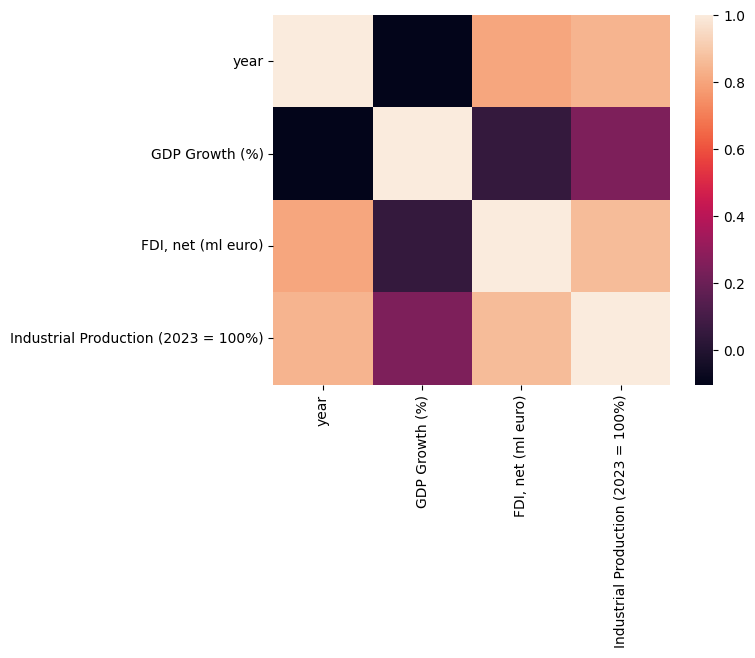

In [114]:
corr = data.corr()
sns.heatmap(corr)

In [115]:
data1 = data[data['year'] >= 1999]

<Axes: >

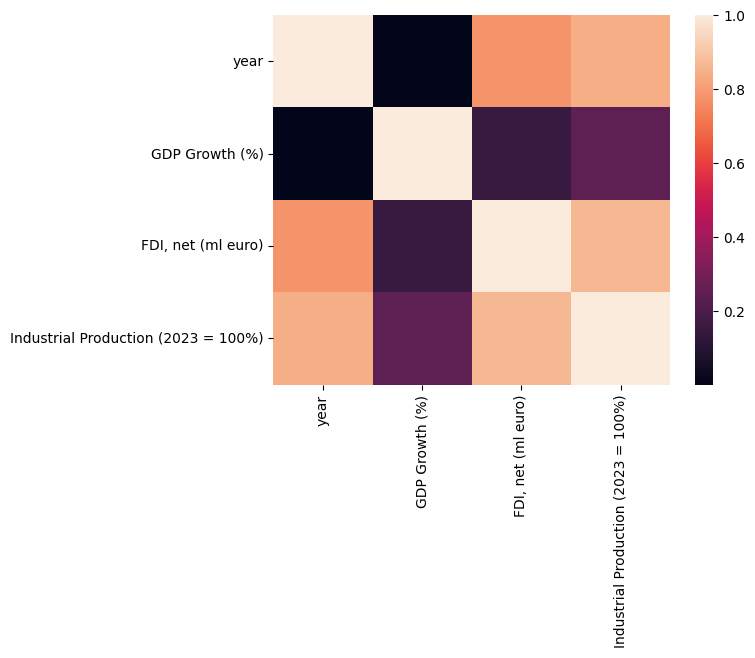

In [116]:
corr = data1.corr()
sns.heatmap(corr)

In [117]:
data

year  GDP Growth (%)  FDI, net (ml euro)  \
0   1995           0.000                 NaN   
1   1996           6.075                 NaN   
2   1997           8.800               654.0   
3   1998           5.775               101.0   
4   1999         -10.350               105.0   
5   2000           7.050                54.0   
6   2001           6.700               184.0   
7   2002           6.550               500.0   
8   2003           4.625              1194.0   
9   2004           6.525               774.0   
10  2005           5.925              1250.0   
11  2006           4.050              3323.0   
12  2007           7.850              2528.2   
13  2008           5.300              2486.7   
14  2009          -3.150              2068.8   
15  2010           1.600              1133.4   
16  2011           0.100              3319.6   
17  2012          -0.450               752.8   
18  2013           0.425              1298.1   
19  2014          -1.725              1236.3   
20  2015           1.275              1803.8   
21  2016           2.975              1899.2   
22  2017           2.375              2418.1   
23  2018           4.675              3156.5   
24  2019           4.675              3551.1   
25  2020          -0.850              2938.5   
26  2021           8.025              3656.9   
27  2022           2.700              4328.2   
28  2023           3.800              4261.6   
29  2024           4.000                 NaN   

    Industrial Production (2023 = 100%)  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                  75.2  
5                                  74.9  
6                                  75.0  
7                                  76.4  
8                                  74.2  
9                                  79.1  
10                                 79.6  
11                                 82.9  
12                                 86.3  
13                                 87.5  
14                                 76.5  
15                                 77.4  
16                                 79.3  
17                                 77.6  
18                                 81.9  
19                                 75.9  
20                                 81.4  
21                                 85.7  
22                                 89.0  
23                                 90.1  
24                                 90.3  
25                                 90.2  
26                                 95.9  
27                                 97.5  
28                                100.0  
29                                103.1

In [118]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

# –£–±–µ—Ä–∏—Ç–µ —Å—Ç—Ä–æ–∫–∏ —Å NaN
data_clean = data.dropna()
data_clean = data_clean[['GDP Growth (%)', 'FDI, net (ml euro)', 'Industrial Production (2023 = 100%)']]
data_clean['FDI_diff'] = data_clean['FDI, net (ml euro)'].diff().dropna()
data_clean['IP_diff'] = data_clean['Industrial Production (2023 = 100%)'].diff().dropna()
data_clean = data_clean[['GDP Growth (%)', 'FDI_diff', 'IP_diff']].dropna()
coint_rank = select_coint_rank(data_clean[['GDP Growth (%)', 'FDI_diff', 'IP_diff']], det_order=0, k_ar_diff=1)
print(coint_rank.summary())

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          62.27          29.80
  1   3          22.17          15.49
  2   3          3.835          3.841
-------------------------------------


In [119]:
from statsmodels.tsa.api import VAR

model = VAR(data_clean)
results = model.fit(maxlags=2, ic='aic')
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 14, Jul, 2025
Time:                     14:29:43
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    18.4936
Nobs:                     22.0000    HQIC:                   17.6975
Log likelihood:          -264.624    FPE:                4.06623e+07
AIC:                      17.4522    Det(Omega_mle):     1.77528e+07
--------------------------------------------------------------------
Results for equation GDP Growth (%)
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     1.381167         0.978755            1.411           0.158
L1.GDP Growth (%)        -0.013744         0.290091           -0.047           0.962
L1.FDI_diff               0.001061 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



In [120]:
from statsmodels.tsa.stattools import grangercausalitytests

# –í—ã–±–µ—Ä–∏—Ç–µ –¥–≤–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∏ —É–±–µ—Ä–∏—Ç–µ –ø—Ä–æ–ø—É—Å–∫–∏
test_data = data_clean[['GDP Growth (%)', 'FDI_diff']]
grangercausalitytests(test_data, maxlag=1)  # maxlag=1 –∏–∑-–∑–∞ –º–∞–ª–æ–≥–æ –æ–±—ä–µ–º–∞ –¥–∞–Ω–Ω—ã—Ö


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0851  , p=0.7735  , df_denom=20, df_num=1
ssr based chi2 test:   chi2=0.0978  , p=0.7544  , df=1
likelihood ratio test: chi2=0.0976  , p=0.7547  , df=1
parameter F test:         F=0.0851  , p=0.7735  , df_denom=20, df_num=1


{np.int64(1): ({'ssr_ftest': (np.float64(0.08507195320386914),
    np.float64(0.7735419690416331),
    np.float64(20.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.09783274618444951),
    np.float64(0.7544460892206281),
    np.int64(1)),
   'lrtest': (np.float64(0.09762526377070913),
    np.float64(0.7546982387143857),
    np.int64(1)),
   'params_ftest': (np.float64(0.08507195320375383),
    np.float64(0.7735419690417806),
    np.float64(20.0),
    1.0)},
   array([[0., 1., 0.]])])}

In [121]:
test_data = data_clean[['GDP Growth (%)', 'IP_diff']]
grangercausalitytests(test_data, maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2511  , p=0.6218  , df_denom=20, df_num=1
ssr based chi2 test:   chi2=0.2887  , p=0.5910  , df=1
likelihood ratio test: chi2=0.2869  , p=0.5922  , df=1
parameter F test:         F=0.2511  , p=0.6218  , df_denom=20, df_num=1


{np.int64(1): ({'ssr_ftest': (np.float64(0.2510827466296853),
    np.float64(0.6217840149859705),
    np.float64(20.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.2887451586241381),
    np.float64(0.5910257864475291),
    np.int64(1)),
   'lrtest': (np.float64(0.2869477133857288),
    np.float64(0.5921831795541717),
    np.int64(1)),
   'params_ftest': (np.float64(0.25108274662968155),
    np.float64(0.6217840149859735),
    np.float64(20.0),
    1.0)},
   array([[0., 1., 0.]])])}

In [122]:
df

time  GDP Growth (%)                   tags  year  z_score  \
0      1995/I –∫–≤–∞—Ä—Ç–∞–ª             0.0                    (–ª)  1995      NaN   
1     1995/II –∫–≤–∞—Ä—Ç–∞–ª             0.0                    (–ª)  1995      NaN   
2    1995/III –∫–≤–∞—Ä—Ç–∞–ª             0.0                    (–ª)  1995      NaN   
3     1995/IV –∫–≤–∞—Ä—Ç–∞–ª             0.0                    (–ª)  1995      NaN   
4      1996/I –∫–≤–∞—Ä—Ç–∞–ª             3.3                    (—Ä)  1996      NaN   
..                ...             ...                    ...   ...      ...   
124                 —Å             NaN  –†–∞–∑–Ω–∏—Ü–∞ –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏   NaN      NaN   
125                 —Ñ             NaN    –í–º–µ–Ω–µ–Ω–Ω–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å   NaN      NaN   
126                 -             NaN      –ù–µ –∏–º–µ–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è   NaN      NaN   
127                 –ø             NaN      –ù–∏–∑–∫–∞—è –Ω–∞–¥–µ–∂–Ω–æ—Å—Ç—å   NaN      NaN   
128                 *             NaN                    NaN   NaN      NaN   

     anomaly  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
124        1  
125        1  
126        1  
127        1  
128        1  

[129 rows x 6 columns]

In [123]:
df_raw = df.iloc[:119]

In [124]:
df_raw = df_raw[['time', 'GDP Growth (%)']]

In [125]:
df_raw

time  GDP Growth (%)
0      1995/I –∫–≤–∞—Ä—Ç–∞–ª             0.0
1     1995/II –∫–≤–∞—Ä—Ç–∞–ª             0.0
2    1995/III –∫–≤–∞—Ä—Ç–∞–ª             0.0
3     1995/IV –∫–≤–∞—Ä—Ç–∞–ª             0.0
4      1996/I –∫–≤–∞—Ä—Ç–∞–ª             3.3
..                ...             ...
114    2023/3 –∫–≤–∞—Ä—Ç–∞–ª             4.8
115   2023/IV –∫–≤–∞—Ä—Ç–∞–ª             5.1
116    2024/I –∫–≤–∞—Ä—Ç–∞–ª             4.7
117   2024/II –∫–≤–∞—Ä—Ç–∞–ª             4.2
118    2024/3 –∫–≤–∞—Ä—Ç–∞–ª             3.1

[119 rows x 2 columns]

In [126]:
#quarter_mapping = {"I –∫–≤–∞—Ä—Ç–∞–ª": "Q1", "II –∫–≤–∞—Ä—Ç–∞–ª": "Q2", "III –∫–≤–∞—Ä—Ç–∞–ª": "Q3", "IV –∫–≤–∞—Ä—Ç–∞–ª": "Q4", "3 –∫–≤–∞—Ä—Ç–∞–ª": "Q3"}

In [127]:
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/I –∫–≤–∞—Ä—Ç–∞–ª", r"\1-Q1", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/II –∫–≤–∞—Ä—Ç–∞–ª", r"\1-Q2", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/III –∫–≤–∞—Ä—Ç–∞–ª", r"\1-Q3", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/IV –∫–≤–∞—Ä—Ç–∞–ª", r"\1-Q4", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/3 –∫–≤–∞—Ä—Ç–∞–ª", r"\1-Q3", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/1-–π –∫–≤–∞—Ä—Ç–∞–ª", r"\1-Q1", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/2-–π –∫–≤–∞—Ä—Ç–∞–ª", r"\1-Q2", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/3-–π –∫–≤–∞—Ä—Ç–∞–ª", r"\1-Q3", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/4-–π –∫–≤–∞—Ä—Ç–∞–ª", r"\1-Q4", regex=True)

In [128]:
df_raw

time  GDP Growth (%)
0    1995-Q1             0.0
1    1995-Q2             0.0
2    1995-Q3             0.0
3    1995-Q4             0.0
4    1996-Q1             3.3
..       ...             ...
114  2023-Q3             4.8
115  2023-Q4             5.1
116  2024-Q1             4.7
117  2024-Q2             4.2
118  2024-Q3             3.1

[119 rows x 2 columns]

In [129]:
df_raw["time"] = pd.PeriodIndex(df_raw["time"], freq="Q")

In [130]:
gdp2005 = pd.read_excel('gdp.xlsx')

In [131]:
gdp2005.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   year                  20 non-null     int64
 1   GDP (in EUR million)  20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes


In [132]:
fig = px.line(gdp2005, x='year', y='GDP (in EUR million)', title="Dynamics of GDP")
fig.update_layout(
    xaxis_title="Time period",
    yaxis_title="GDP",
    xaxis=dict(tickangle=45),
    template="plotly_white"
)

fig.show()

In [133]:
data = pd.merge(data, gdp2005, on='year', how='left')

In [134]:
corr = data.corr()

fig = go.Figure()
fig.add_trace(go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.index,
    colorscale='RdBu',
    zmin=0,
    zmax=1,
    colorbar=dict(title="Correlation")
))

fig.update_layout(
    title="Correlation Heatmap",
    xaxis_title="Features",
    yaxis_title="Features",
    template="plotly_dark"
)

fig.show()


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 30 non-null     int64  
 1   GDP Growth (%)                       30 non-null     float64
 2   FDI, net (ml euro)                   27 non-null     float64
 3   Industrial Production (2023 = 100%)  26 non-null     float64
 4   GDP (in EUR million)                 20 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.3 KB


In [136]:
# –°–æ–∑–¥–∞–µ–º —Ñ–∏–≥—É—Ä—É
fig = go.Figure()

# –í—ã–±–∏—Ä–∞–µ–º –Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã
columns_to_plot = ['FDI, net (ml euro)', 'Industrial Production (2023 = 100%)', 'GDP (in EUR million)', 'GDP Growth (%)']

# –î–æ–±–∞–≤–ª—è–µ–º –ª–∏–Ω–∏–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è
for column in columns_to_plot:
    if column == 'Industrial Production (2023 = 100%)':
        yaxis = "y2"
    elif column == 'FDI, net (ml euro)':
        yaxis = "y3"
    elif column == 'GDP Growth (%)':
        yaxis = "y4"
    else:
        yaxis = "y1"

    fig.add_trace(go.Scatter(
        x=data["year"],
        y=data[column],
        mode='lines+markers',
        name=column,
        yaxis=yaxis
    ))

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –æ—Å–µ–π –∏ –∑–∞–≥–æ–ª–æ–≤–∫–∞
fig.update_layout(
    title="Economic Indicators Over Time",
    xaxis_title="Year",
    yaxis=dict(
        title="GDP (mln EUR)",
        side="left",
        showgrid=False
    ),
    yaxis2=dict(
        title="Industrial Production (2023 = 100%)",
        overlaying="y",
        side="right",
        showgrid=False
    ),
    yaxis3=dict(
        title="FDI, net (mln EUR)",
        overlaying="y",
        side="right",
        position=0.85,
        showgrid=False
    ),
    yaxis4=dict(
        title="GDP Growth (%)",
        overlaying="y",
        side="right",
        position=0.9,
        showgrid=False
    ),
    template="plotly_dark"
)

fig.show()



In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 30 non-null     int64  
 1   GDP Growth (%)                       30 non-null     float64
 2   FDI, net (ml euro)                   27 non-null     float64
 3   Industrial Production (2023 = 100%)  26 non-null     float64
 4   GDP (in EUR million)                 20 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.3 KB


In [138]:
data['FDI Growth(%)'] = data['FDI, net (ml euro)'].pct_change()*100

/tmp/ipython-input-138-1732560555.py:1: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



In [139]:
data.head()

year  GDP Growth (%)  FDI, net (ml euro)  \
0  1995           0.000                 NaN   
1  1996           6.075                 NaN   
2  1997           8.800               654.0   
3  1998           5.775               101.0   
4  1999         -10.350               105.0   

   Industrial Production (2023 = 100%)  GDP (in EUR million)  FDI Growth(%)  
0                                  NaN                   NaN            NaN  
1                                  NaN                   NaN            NaN  
2                                  NaN                   NaN            NaN  
3                                  NaN                   NaN     -84.556575  
4                                 75.2                   NaN       3.960396

In [140]:
corr = data.corr()

fig = go.Figure()
fig.add_trace(go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.index,
    colorscale='RdBu',
    zmin=0,
    zmax=1,
    colorbar=dict(title="Correlation")
))

fig.update_layout(
    title="Correlation Heatmap",
    xaxis_title="Features",
    yaxis_title="Features",
    template="plotly_dark"
)

fig.show()


In [141]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype        
---  ------          --------------  -----        
 0   time            119 non-null    period[Q-DEC]
 1   GDP Growth (%)  119 non-null    float64      
dtypes: float64(1), period[Q-DEC](1)
memory usage: 2.0 KB


In [142]:
df_raw

time  GDP Growth (%)
0    1995Q1             0.0
1    1995Q2             0.0
2    1995Q3             0.0
3    1995Q4             0.0
4    1996Q1             3.3
..      ...             ...
114  2023Q3             4.8
115  2023Q4             5.1
116  2024Q1             4.7
117  2024Q2             4.2
118  2024Q3             3.1

[119 rows x 2 columns]

In [143]:
df_raw.set_index('time', inplace=True)

In [144]:
df_raw.index = df_raw.index.to_timestamp()

In [145]:
def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω")
    else:
        print("–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω, —Ç—Ä–µ–±—É–µ—Ç—Å—è –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ")

adf_test(df_raw['GDP Growth (%)'])

ADF Statistic: -4.079465931136951
p-value: 0.0010470489241555805
–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω


In [146]:
#auto_arima(df_raw['GDP Growth (%)'], seasonal=False, trace=True)

In [147]:
model = ARIMA(df_raw['GDP Growth (%)'], order=(0, 0, 1))
arima_fit = model.fit()

In [148]:
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         GDP Growth (%)   No. Observations:                  119
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -344.503
Date:                Mon, 14 Jul 2025   AIC                            695.005
Time:                        14:29:44   BIC                            703.343
Sample:                    01-01-1995   HQIC                           698.391
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1614      0.727      4.351      0.000       1.737       4.585
ma.L1          0.6638      0.059     11.230      0.000       0.548       0.780
sigma2        19.0524      1.554     12.262      0.0

In [149]:
forecast_steps = 4  # –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ 1 –≥–æ–¥ (4 –∫–≤–∞—Ä—Ç–∞–ª–∞)
forecast_index = pd.date_range(start=df_raw.index[-1], periods=forecast_steps+1, freq='QE')[1:]

forecast = arima_fit.forecast(steps=forecast_steps)

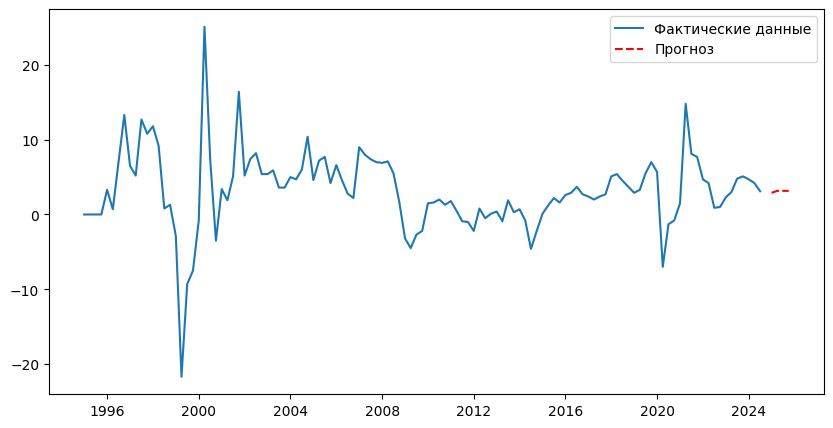

In [150]:
plt.figure(figsize=(10, 5))
plt.plot(df_raw.index, df_raw['GDP Growth (%)'], label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ")
plt.plot(forecast_index, forecast, label="–ü—Ä–æ–≥–Ω–æ–∑", linestyle="dashed", color='red')
plt.legend()
plt.show()

In [151]:
fig = go.Figure()

# –§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ
fig.add_trace(go.Scatter(
    x=df_raw.index,
    y=df_raw['GDP Growth (%)'],
    mode='lines',
    name='–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ'
))

# –ü—Ä–æ–≥–Ω–æ–∑
fig.add_trace(go.Scatter(
    x=forecast_index,
    y=forecast,
    mode='lines',
    name='–ü—Ä–æ–≥–Ω–æ–∑',
    line=dict(dash='dash', color='red')
))

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –≥—Ä–∞—Ñ–∏–∫–∞
fig.update_layout(
    title='–ü—Ä–æ–≥–Ω–æ–∑ GDP Growth (%)',
    xaxis_title='–î–∞—Ç–∞',
    yaxis_title='GDP Growth (%)',
    template='plotly_white'
)

fig.show()
